In [7]:
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [8]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [9]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 819.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.7 MB/s eta 0:00:00


In [10]:
import os
base_dir = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(base_dir))

Contents of the base directory: ['train', 'test', 'validation']


In [11]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

# Defining the paths for the dataset directories
train_dir = '/content/cats_vs_dogs_small/train'
val_dir = '/content/cats_vs_dogs_small/validation'
test_dir = '/content/cats_vs_dogs_small/test'

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [12]:
# Loading the image datasets for training, validation, and testing
train_data = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)

val_data = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size=32)

test_data = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


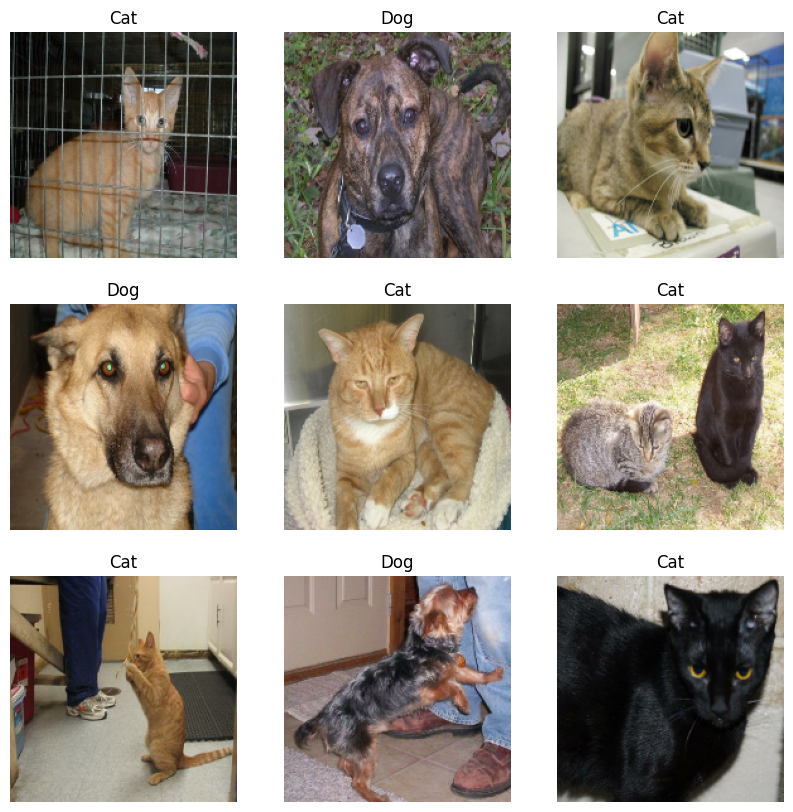

In [13]:
# Visualizing a few sample images from the dataset
def display_samples(data_set):
    plt.figure(figsize=(10, 10))
    for imgs, lbls in data_set.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(imgs[i].numpy().astype("uint8"))
            plt.title("Cat" if lbls[i] == 0 else "Dog")
            plt.axis("off")
    plt.show()

# Displaying few images from the training dataset
display_samples(train_data)


In [14]:
# Defining a function to build a CNN model from scratch
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [15]:
# Applying the data augmentation and preprocessing with adjustable sample size

def create_data_generators(train_dir, val_dir, batch_size, sample_limit=None):
    train_gen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_flow = train_gen.flow_from_directory(
        train_dir,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_flow = val_gen.flow_from_directory(
        val_dir,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_flow, val_flow


In [16]:
# Training the CNN model using the generated training and validation data

def train_cnn(model, train_flow, val_flow, epochs=30):
    history = model.fit(train_flow,
                        validation_data=val_flow,
                        epochs=epochs)
    return history


In [17]:
# Step 1: Training a CNN model from scratch using 1000 samples

train_flow_1, val_flow_1 = create_data_generators(train_dir, val_dir, batch_size=32, sample_limit=1000)

model_1 = create_cnn_model()

history_1 = train_cnn(model_1, train_flow_1, val_flow_1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - accuracy: 0.5077 - loss: 0.8254 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.4943 - loss: 0.6990 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.5266 - loss: 0.6924 - val_accuracy: 0.5020 - val_loss: 0.7008
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.5539 - loss: 0.6870 - val_accuracy: 0.5750 - val_loss: 0.6805
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.5770 - loss: 0.6779 - val_accuracy: 0.5930 - val_loss: 0.6755
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.5999 - loss: 0.6731 - val_accuracy: 0.5890 - val_loss: 0.6695
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.6298 - loss: 0.6527 - val_accuracy: 0.6560 - val_loss: 0.6260
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.6255 - loss: 0.6456 - val_accu

In [19]:
# Step 2: Expanding the training data to 1500 samples

train_flow_2, val_flow_2 = create_data_generators(train_dir, val_dir, batch_size=32, sample_limit=1500)

model_2 = create_cnn_model()

history_2 = train_cnn(model_2, train_flow_2, val_flow_2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - accuracy: 0.4935 - loss: 0.9423 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.4999 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5550 - val_loss: 0.7087
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.5137 - loss: 0.6963 - val_accuracy: 0.5310 - val_loss: 0.6923
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.5060 - loss: 0.6926 - val_accuracy: 0.5150 - val_loss: 0.6885
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.5316 - loss: 0.6866 - val_accuracy: 0.5540 - val_loss: 0.7178
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.5804 - loss: 0.6770 - val_accuracy: 0.5550 - val_loss: 0.6851
Epoch 8/30
63

In [20]:
# Step 3: Training the model using the full dataset of 2000 samples

train_flow_3, val_flow_3 = create_data_generators(train_dir, val_dir, batch_size=32, sample_limit=2000)

model_3 = create_cnn_model()

history_3 = train_cnn(model_3, train_flow_3, val_flow_3)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.5070 - loss: 0.8958 - val_accuracy: 0.5000 - val_loss: 0.7511
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.5365 - loss: 0.6937 - val_accuracy: 0.5890 - val_loss: 0.6554
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.6341 - loss: 0.6553 - val_accuracy: 0.6570 - val_loss: 0.6015
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.6616 - loss: 0.6297 - val_accuracy: 0.6210 - val_loss: 0.6307
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.6417 - loss: 0.6325 - val_accuracy: 0.6880 - val_loss: 0.5816
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.6609 - loss: 0.6144 - val_accuracy: 0.6790 - val_loss: 0.5938
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.6511 - loss: 0.6272 - val_accuracy: 0.7070 - val_loss: 0.5786
Epoch 8/30
63

In [21]:
# Step 4: Building and using a pretrained model

def create_pretrained_cnn():
    base_cnn = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_cnn.trainable = False

    model = models.Sequential([
        base_cnn,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [22]:
# Repeating the above Steps 1-3 using the pretrained CNN model

pretrained_model_1 = create_pretrained_cnn()
history_pretrained_1 = train_cnn(pretrained_model_1, train_flow_1, val_flow_1)

pretrained_model_2 = create_pretrained_cnn()
history_pretrained_2 = train_cnn(pretrained_model_2, train_flow_2, val_flow_2)

pretrained_model_3 = create_pretrained_cnn()
history_pretrained_3 = train_cnn(pretrained_model_3, train_flow_3, val_flow_3)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6499 - loss: 1.4642 - val_accuracy: 0.8970 - val_loss: 0.2511
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 998ms/step - accuracy: 0.8343 - loss: 0.3598 - val_accuracy: 0.8860 - val_loss: 0.2606
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8468 - loss: 0.3350 - val_accuracy: 0.9070 - val_loss: 0.2319
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8712 - loss: 0.2974 - val_accuracy: 0.9070 - val_loss: 0.2431
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8634 - loss: 0.2973 - val_accuracy: 0.8980 - val_loss: 0.2379
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8811 - loss: 0.2814 - val_accuracy: 0.8880 - val_loss: 0.2738
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8676 - loss: 0.2947 - val_accuracy: 0.9090 - val_loss: 0.2198
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0

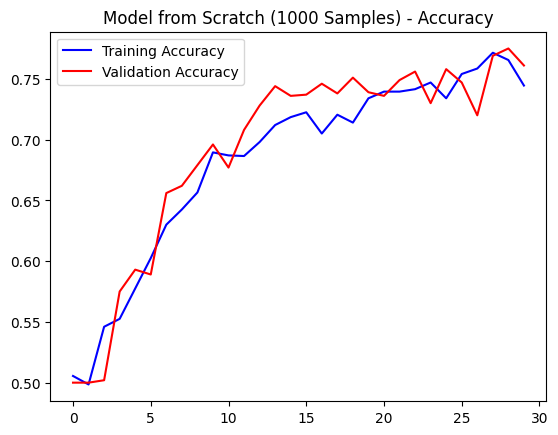

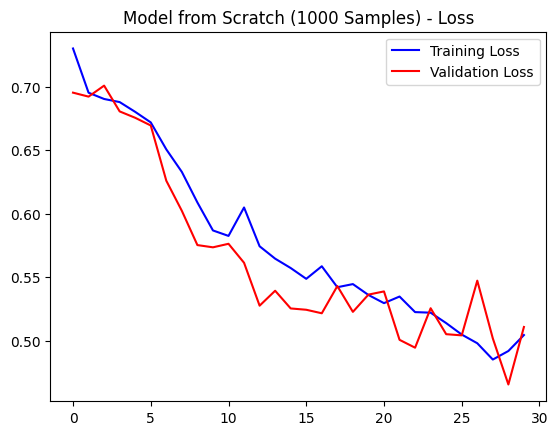

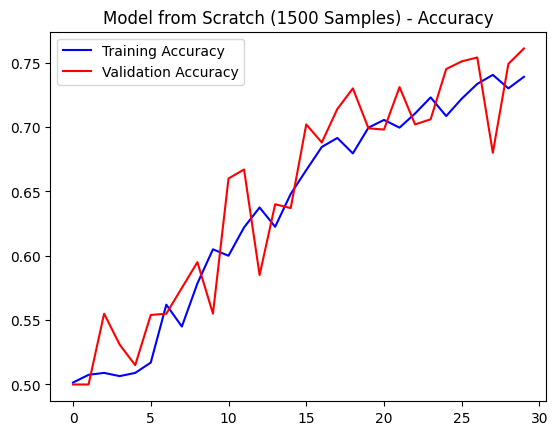

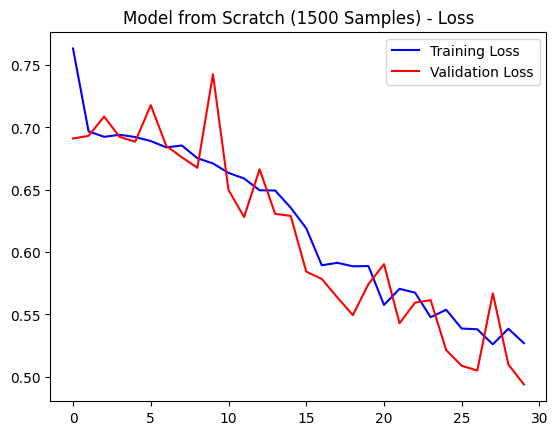

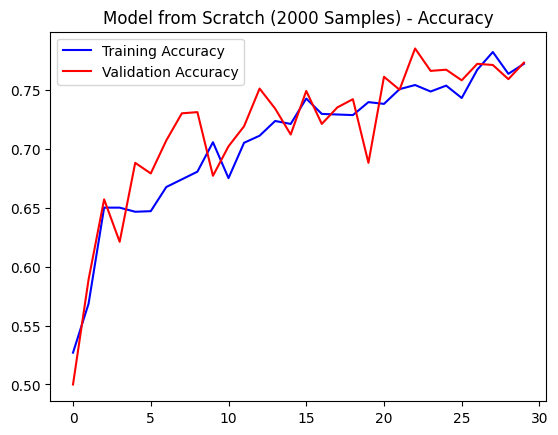

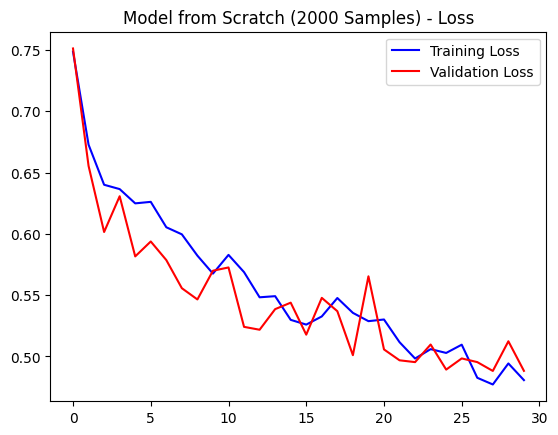

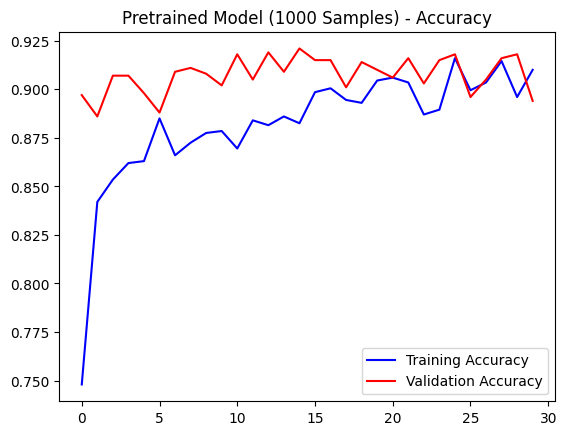

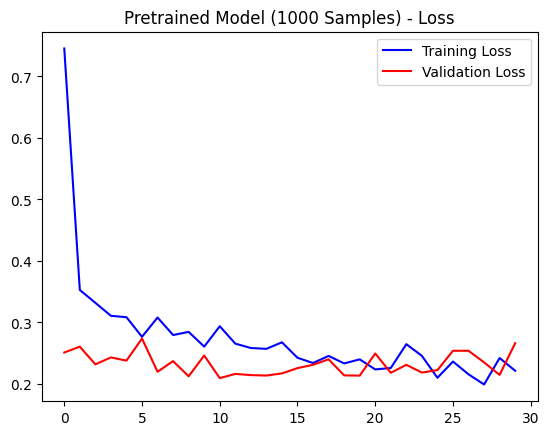

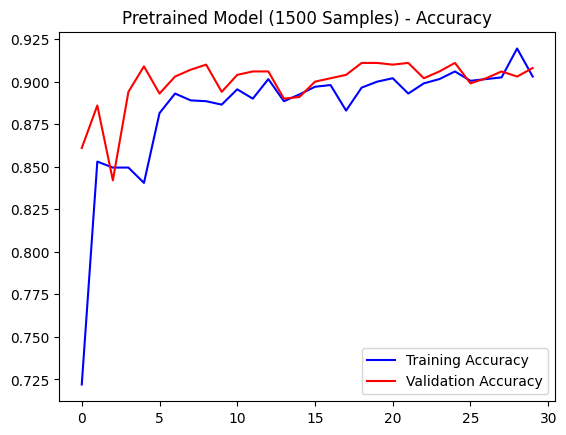

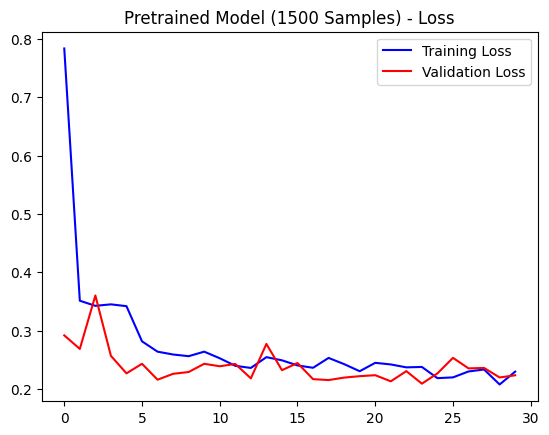

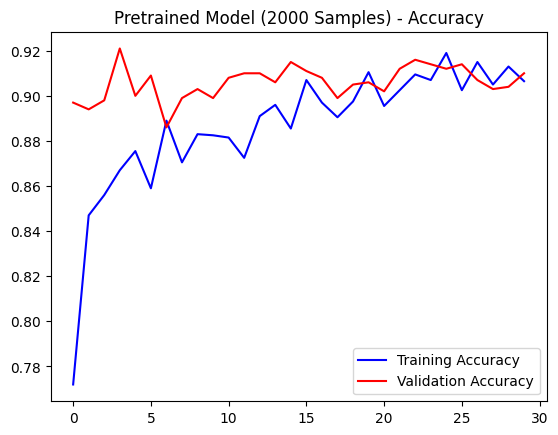

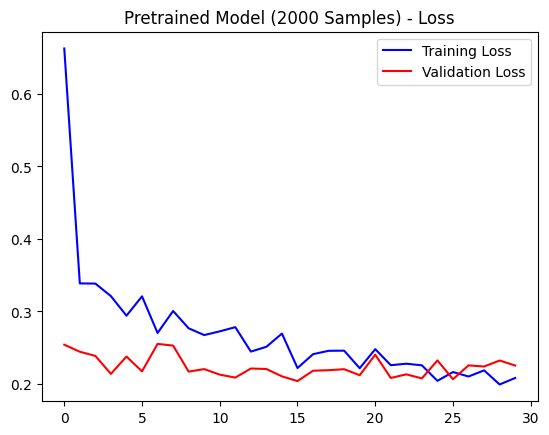

In [23]:
# Function used to visualize the training and validation accuracy and loss

def plot_model_performance(history, title):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(accuracy))

    plt.figure()
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.legend()
    plt.show()

# Displaying the model performance for all training configurations

plot_model_performance(history_1, 'Model from Scratch (1000 Samples)')
plot_model_performance(history_2, 'Model from Scratch (1500 Samples)')
plot_model_performance(history_3, 'Model from Scratch (2000 Samples)')
plot_model_performance(history_pretrained_1, 'Pretrained Model (1000 Samples)')
plot_model_performance(history_pretrained_2, 'Pretrained Model (1500 Samples)')
plot_model_performance(history_pretrained_3, 'Pretrained Model (2000 Samples)')


In [24]:
# Function to compile and display final model performance metrics

def summarize_results(histories_list, labels_list):
    results_summary = {}

    for i, history in enumerate(histories_list):
        train_acc = history.history['accuracy'][-1]
        val_acc = history.history['val_accuracy'][-1]
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]

        results_summary[labels_list[i]] = {
            'Final Training Accuracy': train_acc,
            'Final Validation Accuracy': val_acc,
            'Final Training Loss': train_loss,
            'Final Validation Loss': val_loss,
        }

    return results_summary

# Example for the usage to generate the final results summary

all_histories = [history_1, history_2, history_3,
                 history_pretrained_1, history_pretrained_2, history_pretrained_3]

model_labels = [
    'Model from Scratch (1000 Samples)',
    'Model from Scratch (1500 Samples)',
    'Model from Scratch (2000 Samples)',
    'Pretrained Model (1000 Samples)',
    'Pretrained Model (1500 Samples)',
    'Pretrained Model (2000 Samples)'
]

# Retrieving the summary of final accuracy and loss values

final_results = summarize_results(all_histories, model_labels)
final_results


{'Model from Scratch (1000 Samples)': {'Final Training Accuracy': 0.7444999814033508,
  'Final Validation Accuracy': 0.7609999775886536,
  'Final Training Loss': 0.5044312477111816,
  'Final Validation Loss': 0.5107851028442383},
 'Model from Scratch (1500 Samples)': {'Final Training Accuracy': 0.7390000224113464,
  'Final Validation Accuracy': 0.7609999775886536,
  'Final Training Loss': 0.5269097089767456,
  'Final Validation Loss': 0.49374905228614807},
 'Model from Scratch (2000 Samples)': {'Final Training Accuracy': 0.7720000147819519,
  'Final Validation Accuracy': 0.7730000019073486,
  'Final Training Loss': 0.48071911931037903,
  'Final Validation Loss': 0.48828449845314026},
 'Pretrained Model (1000 Samples)': {'Final Training Accuracy': 0.9100000262260437,
  'Final Validation Accuracy': 0.8939999938011169,
  'Final Training Loss': 0.2214033305644989,
  'Final Validation Loss': 0.26620787382125854},
 'Pretrained Model (1500 Samples)': {'Final Training Accuracy': 0.902999997138

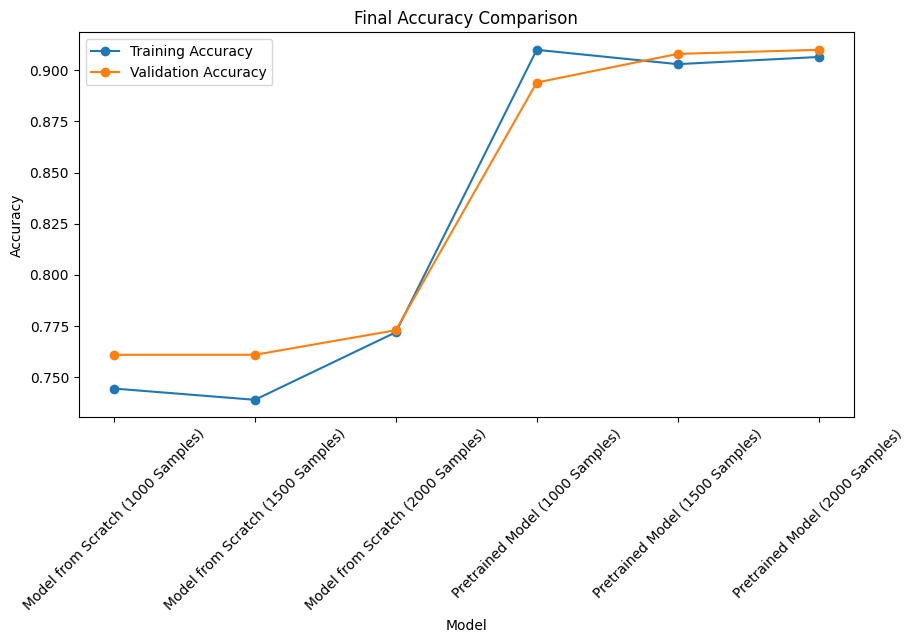

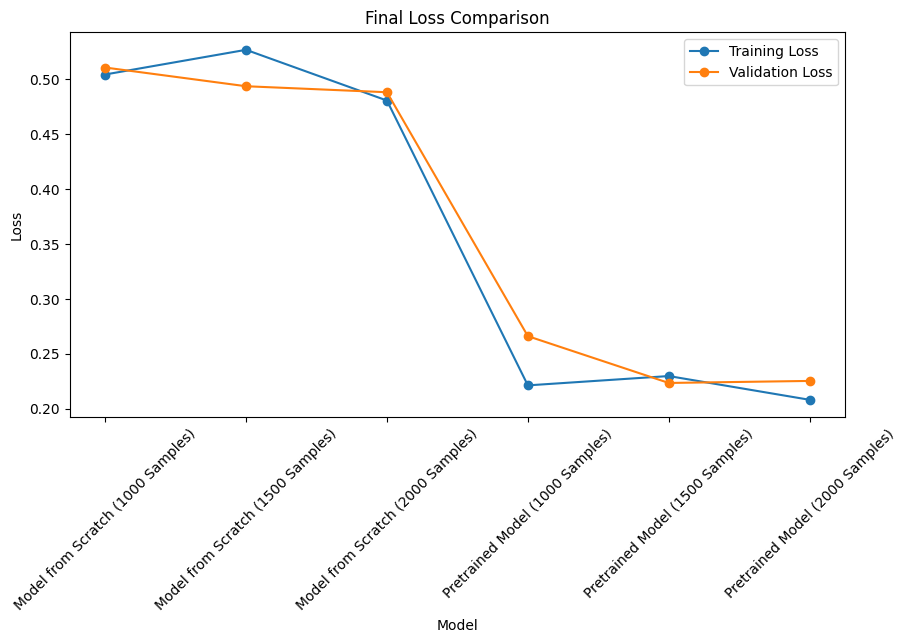

In [26]:
# Visualizing the comparison of final metrics across models

def compare_models(final_scores):
    model_names = list(final_scores.keys())
    acc_train = [final_scores[name]['Final Training Accuracy'] for name in model_names]
    acc_val = [final_scores[name]['Final Validation Accuracy'] for name in model_names]
    loss_train = [final_scores[name]['Final Training Loss'] for name in model_names]
    loss_val = [final_scores[name]['Final Validation Loss'] for name in model_names]

    # Plotting the final training vs validation accuracy

    plt.figure(figsize=(10, 5))
    plt.plot(model_names, acc_train, label='Training Accuracy', marker='o')
    plt.plot(model_names, acc_val, label='Validation Accuracy', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plotting the final training vs validation loss

    plt.figure(figsize=(10, 5))
    plt.plot(model_names, loss_train, label='Training Loss', marker='o')
    plt.plot(model_names, loss_val, label='Validation Loss', marker='o')
    plt.xticks(rotation=45)
    plt.title('Final Loss Comparison')
    plt.xlabel('Model')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Generating the aggregated final scores (kept as-is per structure)

final_scores = summarize_results(all_histories, model_labels)  # Aggregates final metrics

# Producing the comparison plots for accuracy and loss

compare_models(final_scores)